****
# Introduction #
****

**Dataset Details:**

This dataset aims to analyze public preferences between two popular vacation types: mountains and beaches. It provides insights into various demographic and lifestyle factors that may influence these preferences. By exploring this dataset, users can apply multiple machine learning techniques to predict whether individuals prefer mountains or beaches based on their attributes.

**Features:**

* Age: Age of the individual (numerical).
* Gender: Gender identity of the individual (categorical: male, female, non-binary).
* Income: Annual income of the individual (numerical).
* Education Level: Highest level of education attained (categorical: high school, bachelor, master, doctorate).
* Travel Frequency: Number of vacations taken per year (numerical).
* Preferred Activities: Activities preferred by individuals during vacations (categorical: hiking, swimming, skiing, sunbathing).
* Vacation Budget: Budget allocated for vacations (numerical).Location: Type of residence (categorical: urban, suburban, rural).
* Proximity to Mountains: Distance from the nearest mountains (numerical, in miles).
* Proximity to Beaches: Distance from the nearest beaches (numerical, in miles).
* Favorite Season: Preferred season for vacations (categorical: summer, winter, spring, fall).
* Pets: Indicates whether the individual owns pets (binary: 0 = No, 1 = Yes).
* Environmental Concerns: Indicates whether the individual has environmental concerns (binary: 0 = No, 1 = Yes).

**Target Variable:**

* Preference: Indicates whether an individual prefers Mountains (1) or Beaches (0)

**About the Notebook:**

This notebook aims to successfully classify whether an individual prefers Moutains or Beaches while comparing how 2 different algorithms differ while classifying.

**Please Upvote and Provide Feedback:**
* Kindly upvote if you liked the notebook or you found this helpful.
* Please provide feedback and suggestions to improve this notebook.

****
# Reading and Displaying Data #
****

In [1]:
# importing 
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'/kaggle/input/mountains-vs-beaches-preference/mountains_vs_beaches_preferences.csv')
df # displaying data

Age      Gender  Income Education_Level  Travel_Frequency  \
0       56        male   71477        bachelor                 9   
1       69        male   88740          master                 1   
2       46      female   46562          master                 0   
3       32  non-binary   99044     high school                 6   
4       60      female  106583     high school                 5   
...    ...         ...     ...             ...               ...   
52439   67      female   85325          master                 3   
52440   37      female  110346        bachelor                 7   
52441   53  non-binary   71080       doctorate                 7   
52442   40      female   75174       doctorate                 9   
52443   33  non-binary   34475          master                 6   

      Preferred_Activities  Vacation_Budget  Location  Proximity_to_Mountains  \
0                   skiing             2477     urban                     175   
1                 swimming             4777  suburban                     228   
2                   skiing             1469     urban                      71   
3                   hiking             1482     rural                      31   
4               sunbathing              516  suburban                      23   
...                    ...              ...       ...                     ...   
52439               hiking             1762  suburban                      51   
52440             swimming             1676     urban                     259   
52441             swimming             3877     urban                     164   
52442             swimming             4620  suburban                     173   
52443               hiking              928  suburban                     218   

       Proximity_to_Beaches Favorite_Season  Pets  Environmental_Concerns  \
0                       267          summer     0                       1   
1                       190            fall     0                       1   
2                       280          winter     0                       0   
3                       255          summer     1                       0   
4                       151          winter     1                       1   
...                     ...             ...   ...                     ...   
52439                   262            fall     1                       0   
52440                    84          spring     1                       0   
52441                    27            fall     0                       1   
52442                    10          summer     0                       1   
52443                   166          spring     1                       0   

       Preference  
0               1  
1               0  
2               1  
3               1  
4               0  
...           ...  
52439           1  
52440           0  
52441           0  
52442           0  
52443           0  

[52444 rows x 14 columns]

****
# Data Visualization and Analysis #
****

In [3]:
# importing 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency',
       'Preferred_Activities', 'Vacation_Budget', 'Location',
       'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season',
       'Pets', 'Environmental_Concerns', 'Preference'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


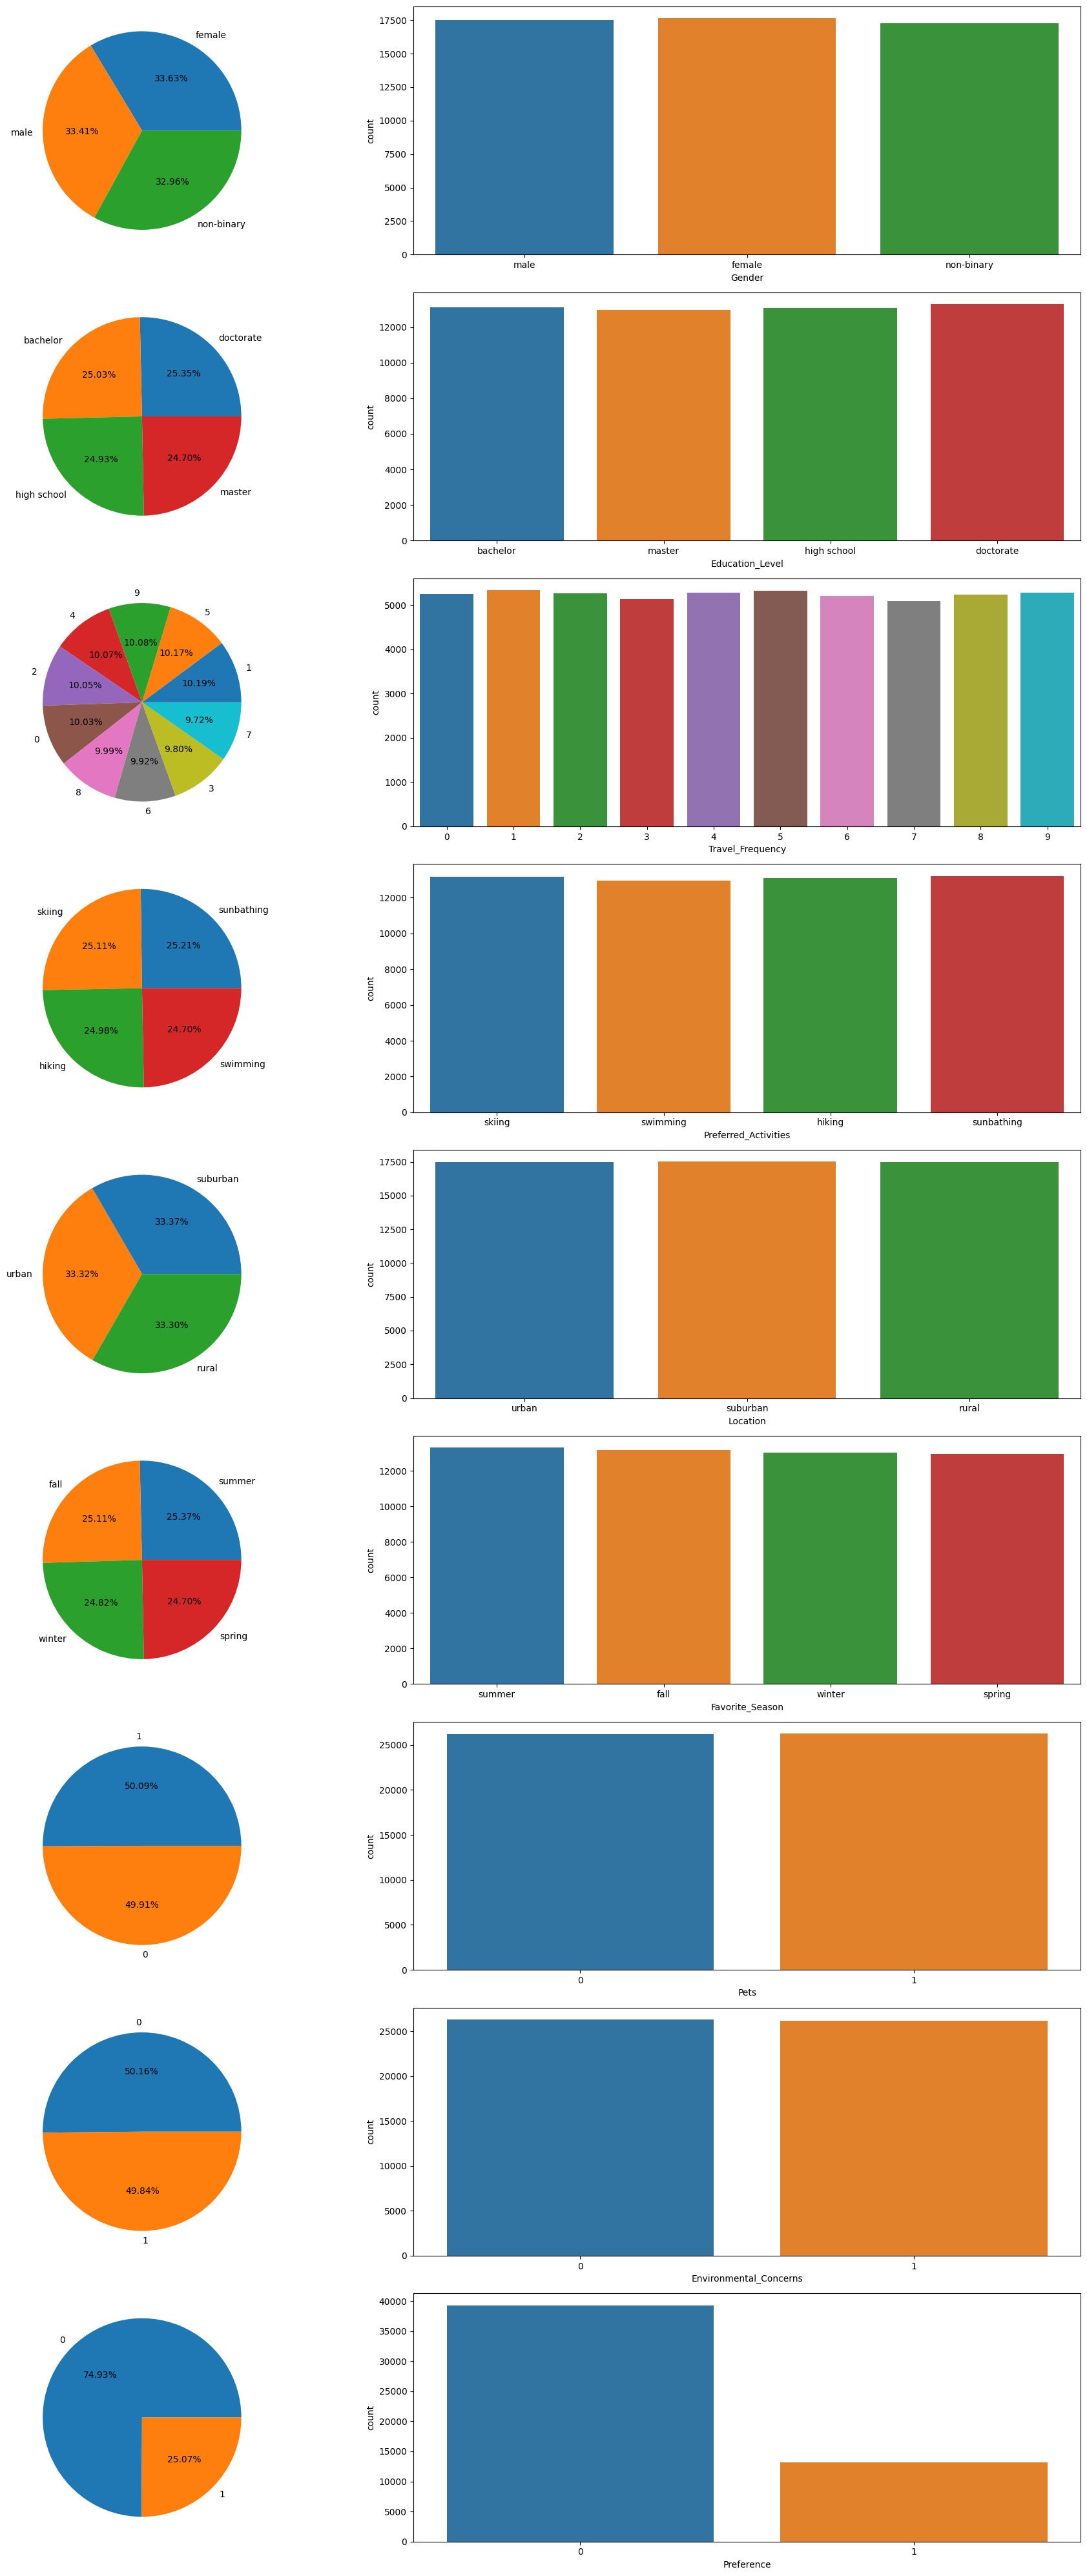

In [6]:
# Let us look at the distribuion of some of the categorical columns
# We will visualize them using both a pie chart and a count plot

cols=['Gender','Education_Level','Travel_Frequency','Preferred_Activities','Location',
'Favorite_Season','Pets', 'Environmental_Concerns', 'Preference']

fig,ax=plt.subplots(9,2,figsize=(20,40))
ax=ax.flatten()
i=0
for col in cols:
    tdf=df[col].value_counts().reset_index()
    ax[i].pie(tdf['count'],labels=tdf[col],autopct='%.2f%%')
    ax[i].set_aspect('equal')
    i+=1
    if(i%2!=0):
        sns.countplot(data=df,x=col,ax=ax[i])
        i+=1
plt.tight_layout()
plt.show()

**Findings:**


1. The Gender feature is well-balanced, with each category comprising approximately 33% of the total.
2. Similarly, the Education Level feature is evenly distributed, with each category accounting for around 25% of the feature.
3. The Travel Frequency feature (ranging from 0 to 9) is generally balanced, though Travel Frequency 1 shows a slight dominance.
4. All four Preferred Activities are equally represented, each contributing about 25% to the feature. The same applies to the Favorite Season feature, where each season constitutes around 25%.
5. The Pets and Environmental Concerns features are also balanced across their categories.
6. However, the target variable, Preference, is unbalanced, with a noticeably higher proportion of individuals favoring Beaches compared to those who prefer Moutains.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

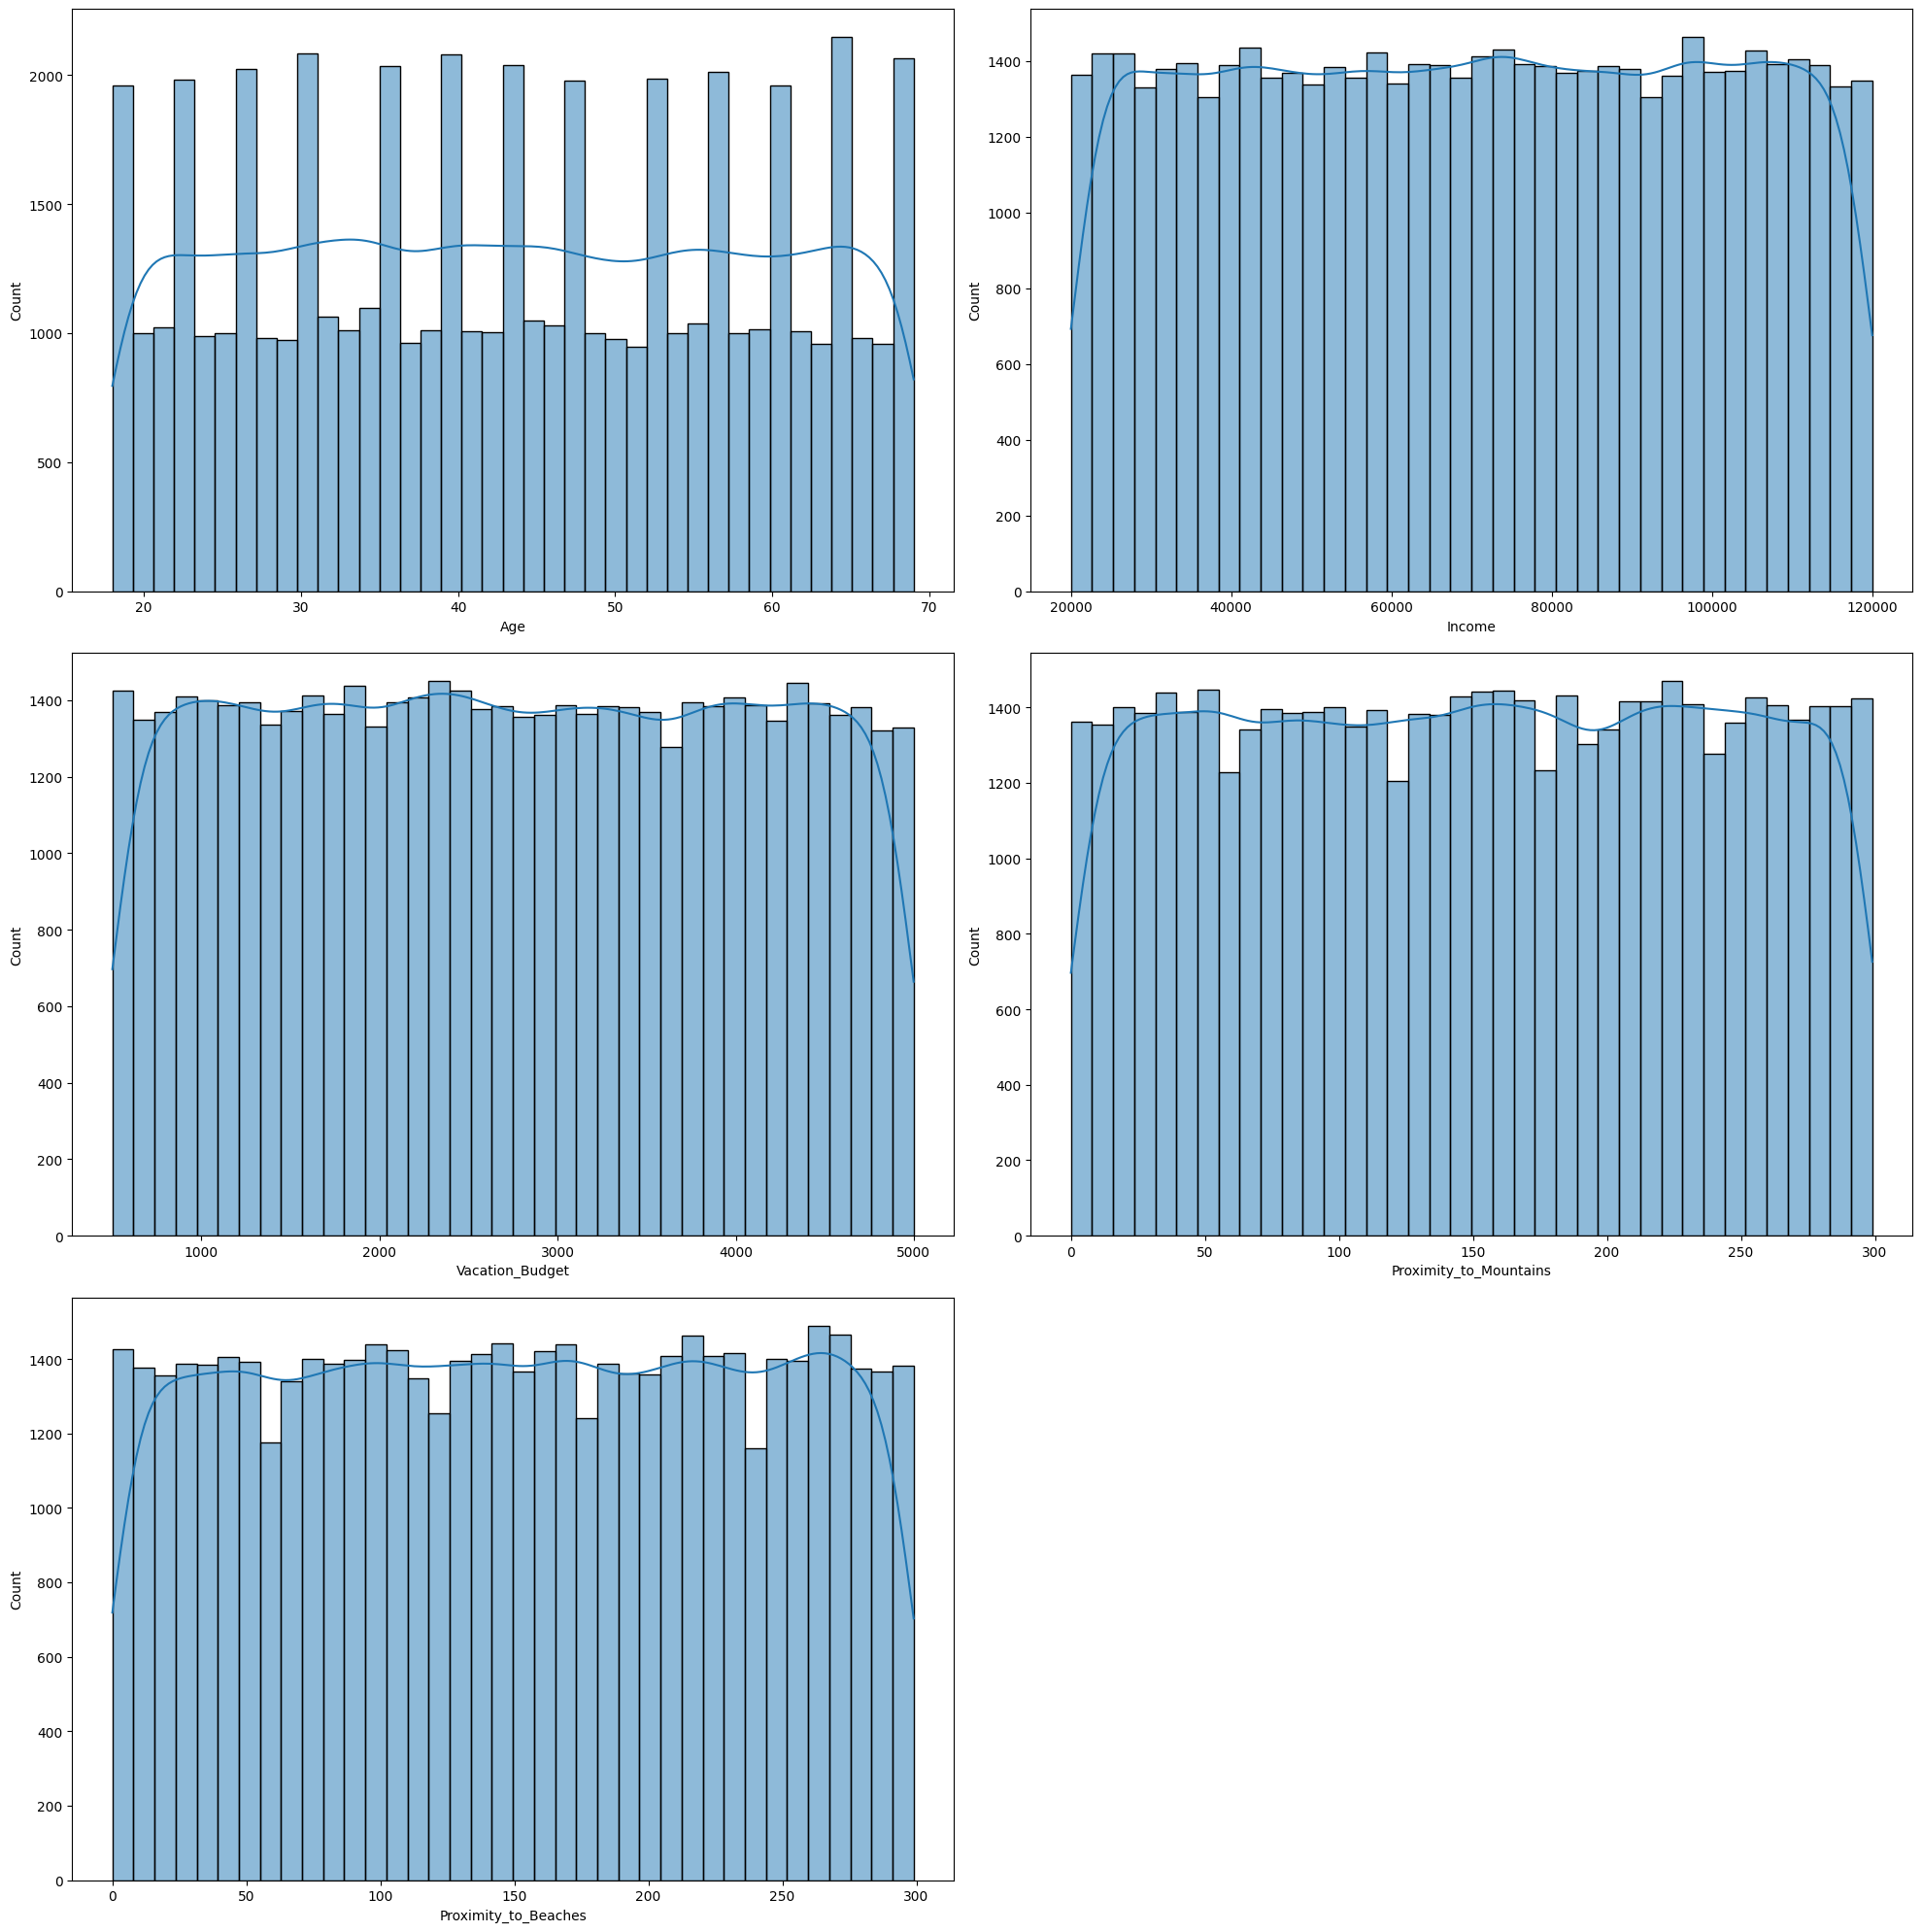

In [7]:
# let us look at the reminaing columns
# We will visualize their distribution using a histogram
cols=['Age','Income','Vacation_Budget',
       'Proximity_to_Mountains', 'Proximity_to_Beaches']

fig,ax=plt.subplots(3,2,figsize=(20,20))
ax=ax.flatten()
i=0

for col in cols:
    sns.histplot(data=df,x=col,kde=True,ax=ax[i])
    i+=1
plt.tight_layout()
ax[5].axis('off')
plt.show()

**Insights:**

**Age Distribution:**

The distribution is roughly uniform across the age range, with a slight dip in the middle age groups.
Younger and older age groups (e.g., 20-30 and 60-70) seem to have slightly higher counts compared to the middle age range.

**Income Distribution:**

The income levels are evenly distributed within the given range (20,000 to 120,000), with no significant skew or outliers.
There is a very slight decrease in the lower and higher income ranges compared to the middle.

**Vacation Budget:**

The vacation budget appears to be evenly spread across the range of 1,000 to 5,000.
There is a slight increase in the middle budget range, but overall, it is well-balanced.

**Proximity to Mountains:**

The proximity to mountains is uniformly distributed across the range of 0 to 300.
The counts in extreme values (close to 0 and 300) are slightly lower, while the middle values are more frequent.


**Proximity to Beaches:**

The proximity to Beaches has no significant bias or dominance with a slight dip in the extreme ranges and ranges between 50-100 and distribution around 250, while the rest of the distribution has no sudden spike in frequency so its almost well balanced.





**General Insight:**

**The distributions for Age, Income, Vacation Budget,Proximity to Beaches and Proximity to Mountains are fairly balanced, suggesting no significant bias or dominance of specific values in the data. These balanced distributions can help ensure the features do not overly influence predictions or cause model imbalances.**






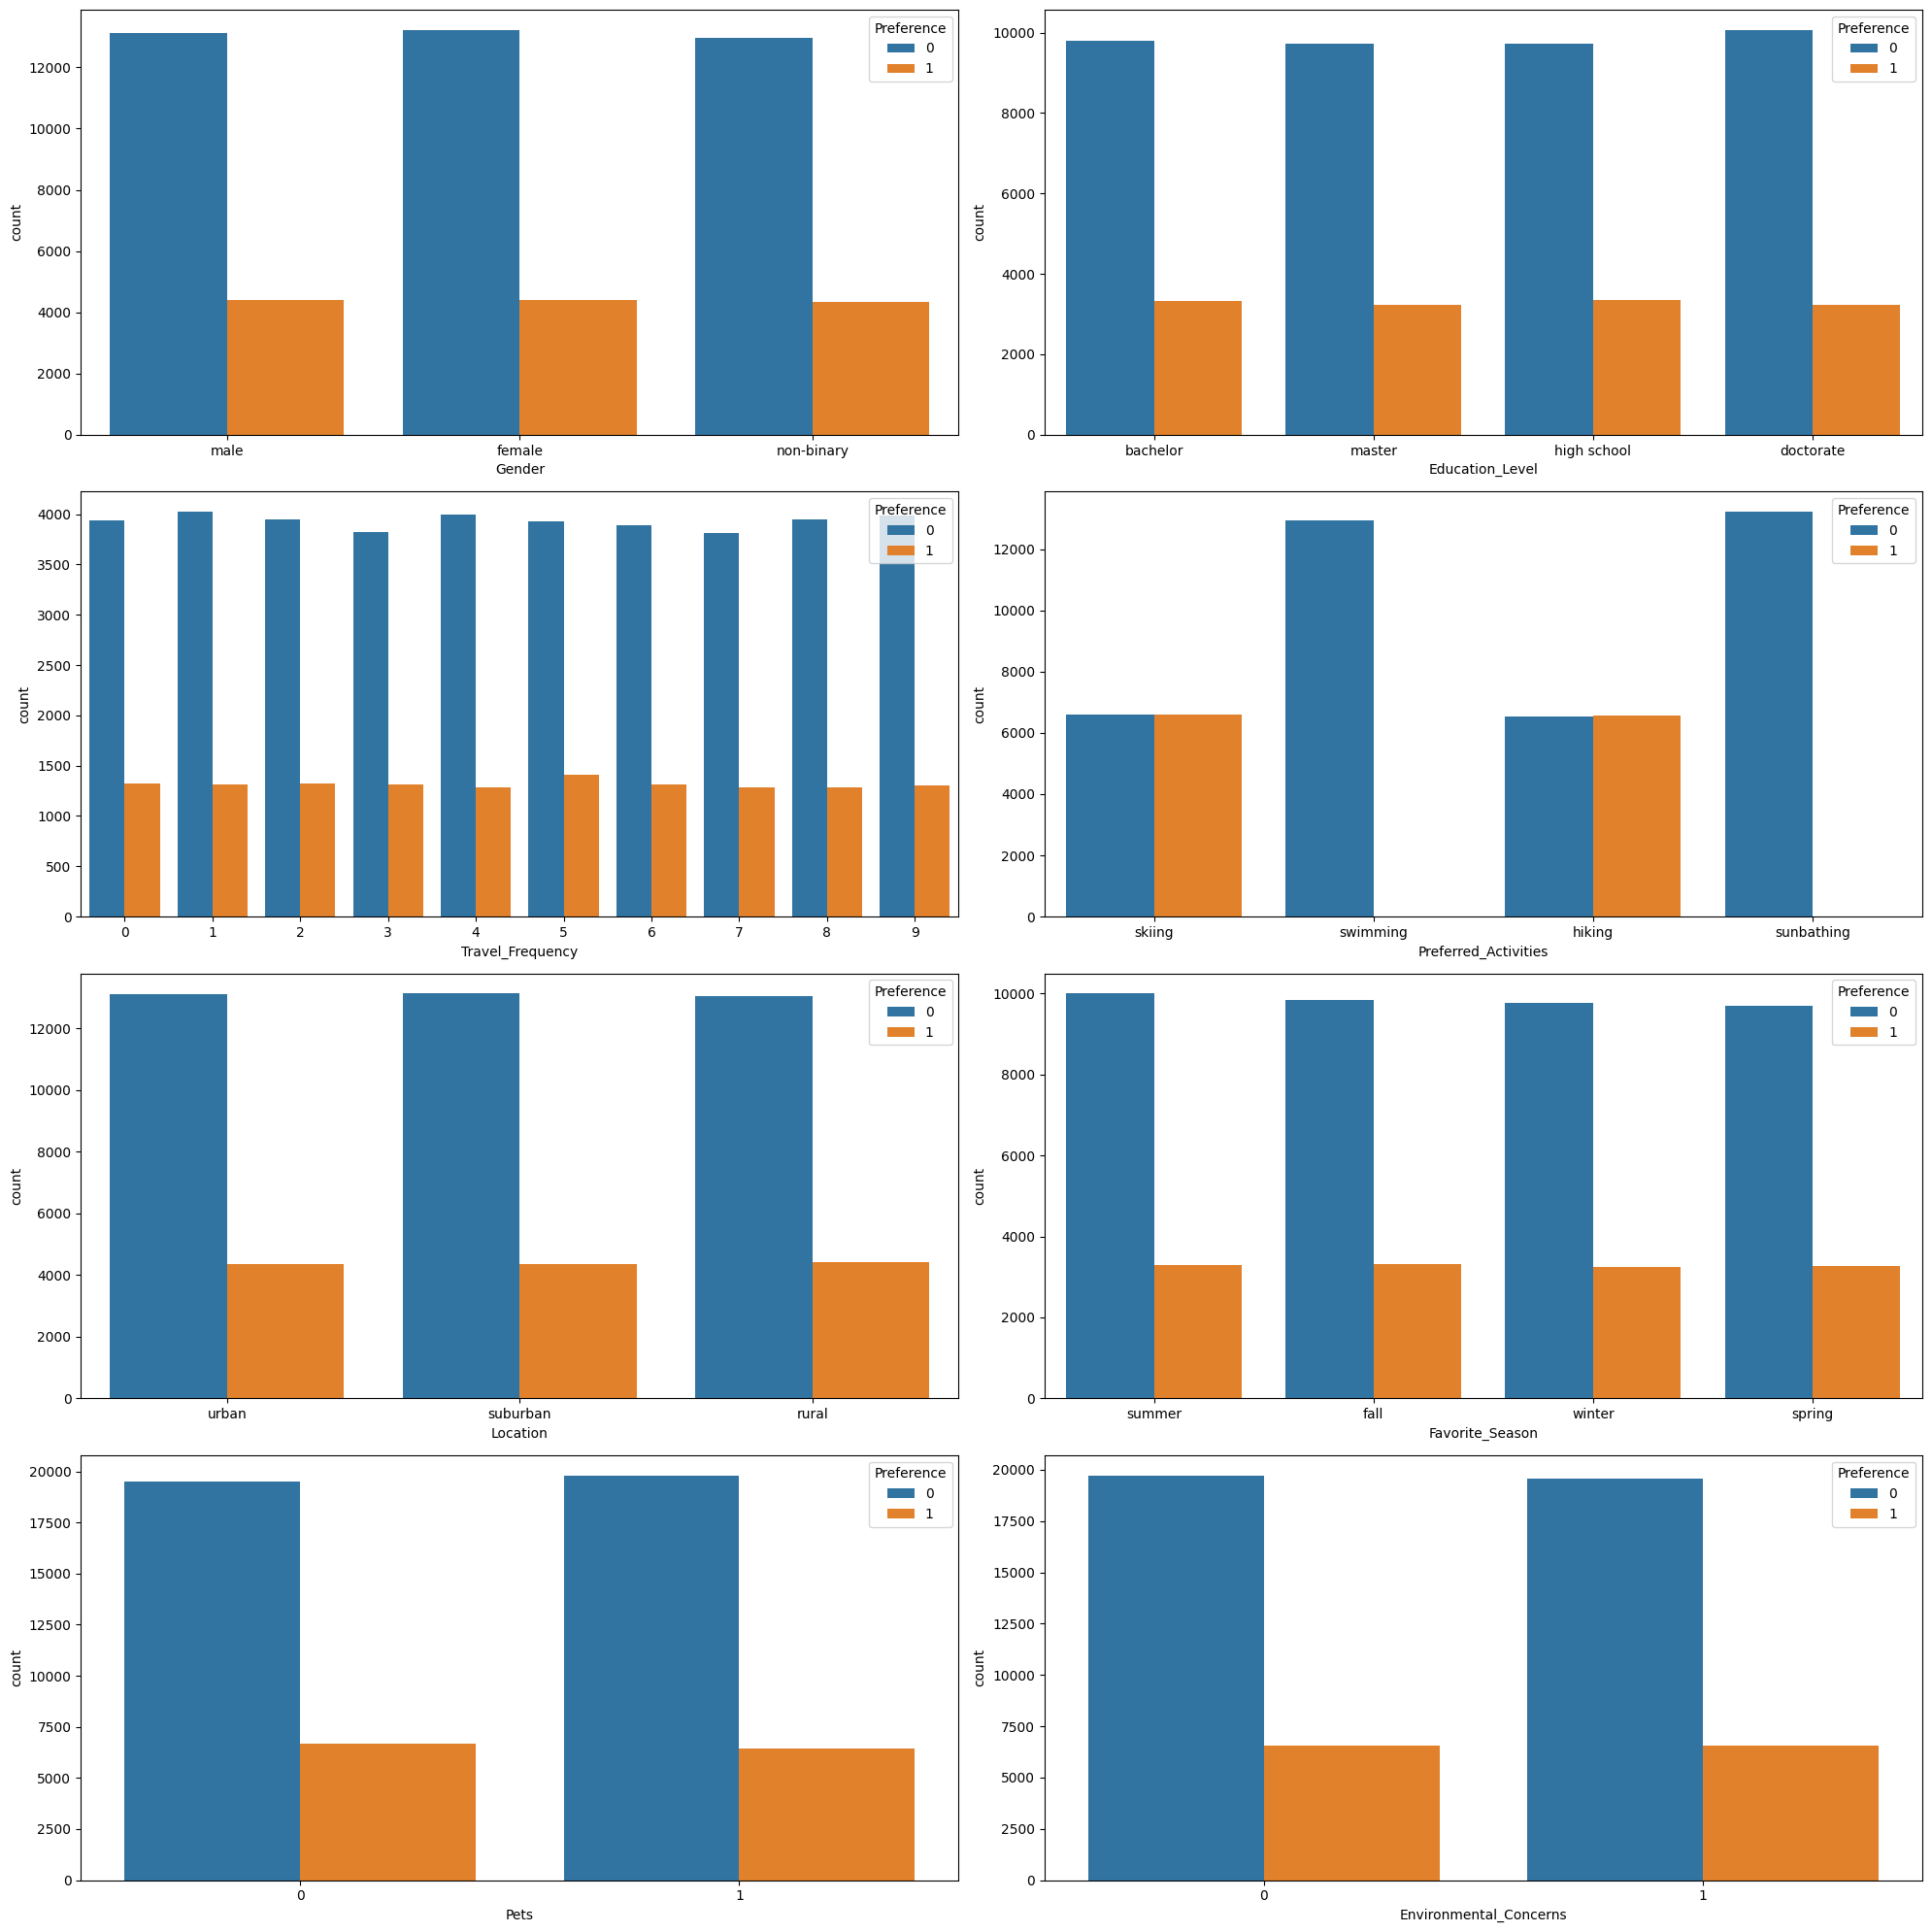

In [8]:
# We have seen how our data is distributed 
# Now let us look at how our data affects our target variable
# First let us plot a countplot to check how our categorical features affects out target

cols=['Gender','Education_Level','Travel_Frequency','Preferred_Activities','Location',
'Favorite_Season','Pets', 'Environmental_Concerns']

fig,ax=plt.subplots(4,2,figsize=(20,20))
ax=ax.flatten()
i=0
for col in cols:
    sns.countplot(data=df,x=col,ax=ax[i],hue='Preference')
    i+=1
plt.tight_layout()
plt.show()

**Preference 0 -> Beaches**

**Preference 1 -> Mountains**

**Insights:**

**Gender vs. Preference:**


* The counts for males, females, and non-binary individuals are relatively balanced in total.
* Preference 0 (likely "Mountains") dominates across all genders, with much higher counts compared to Preference 1 (likely "Beaches").
* The distribution of preferences remains consistent across gender categories.


**Education Level vs. Preference:**


* Education levels (Bachelor, Master, High School, and Doctorate) are fairly balanced overall.
* Preference 0 is consistently more popular than Preference 1 across all education levels.
* There is no noticeable variation in preferences across different education levels.


**Travel Frequency vs. Preference:**


* Travel Frequency values (0 to 9) are evenly distributed in total, showing a balanced dataset.
* Across all travel frequencies, Preference 0 is significantly higher than Preference 1.
* The distribution remains consistent across different travel frequency levels.


**Preferred Activities vs. Preference:**


* All four activities (Skiing, Swimming, Hiking, and Sunbathing) are represented in the dataset.
* Swimming and Sunbathing have the highest overall counts, followed by Skiing and Hiking.
* Preference 0 is significantly higher than Preference 1 across all activities, but the gap is most pronounced in Swimming and Sunbathing.


**Location vs. Preference:**


* Urban, Suburban, and Rural locations have relatively balanced counts overall.
* Preference 0 (likely "Mountains") is significantly higher than Preference 1 (likely "Beaches") across all location types.
* The distribution of preferences is consistent across different location categories.


**Favorite Season vs. Preference:**


* All four seasons (Summer, Fall, Winter, and Spring) are evenly distributed in terms of total counts.
* Preference 0 dominates across all seasons, with noticeably higher counts compared to Preference 1.
* There is no significant difference in the distribution of preferences among the seasons.


**Pets vs. Preference:**

* The feature "Pets" (0 = No Pets, 1 = Has Pets) is balanced in total counts.Preference 0 is more common than Preference 1 for both categories (with and without pets).
* The presence or absence of pets does not seem to influence the preference distribution significantly.


**Environmental Concerns vs. Preference:**


* Environmental Concerns (0 = No Concern, 1 = Concerned) are balanced overall.
* Preference 0 is higher than Preference 1 for both categories, indicating a consistent trend regardless of environmental concern levels.


**General Observations:**

The target variable (Preference) is imbalanced, with
Preference 0 being the dominant category across all features.
None of the features show significant differences in the distribution of Preference 0 and Preference 1.All the features are well-balanced, ensuring they don’t introduce bias into the model.

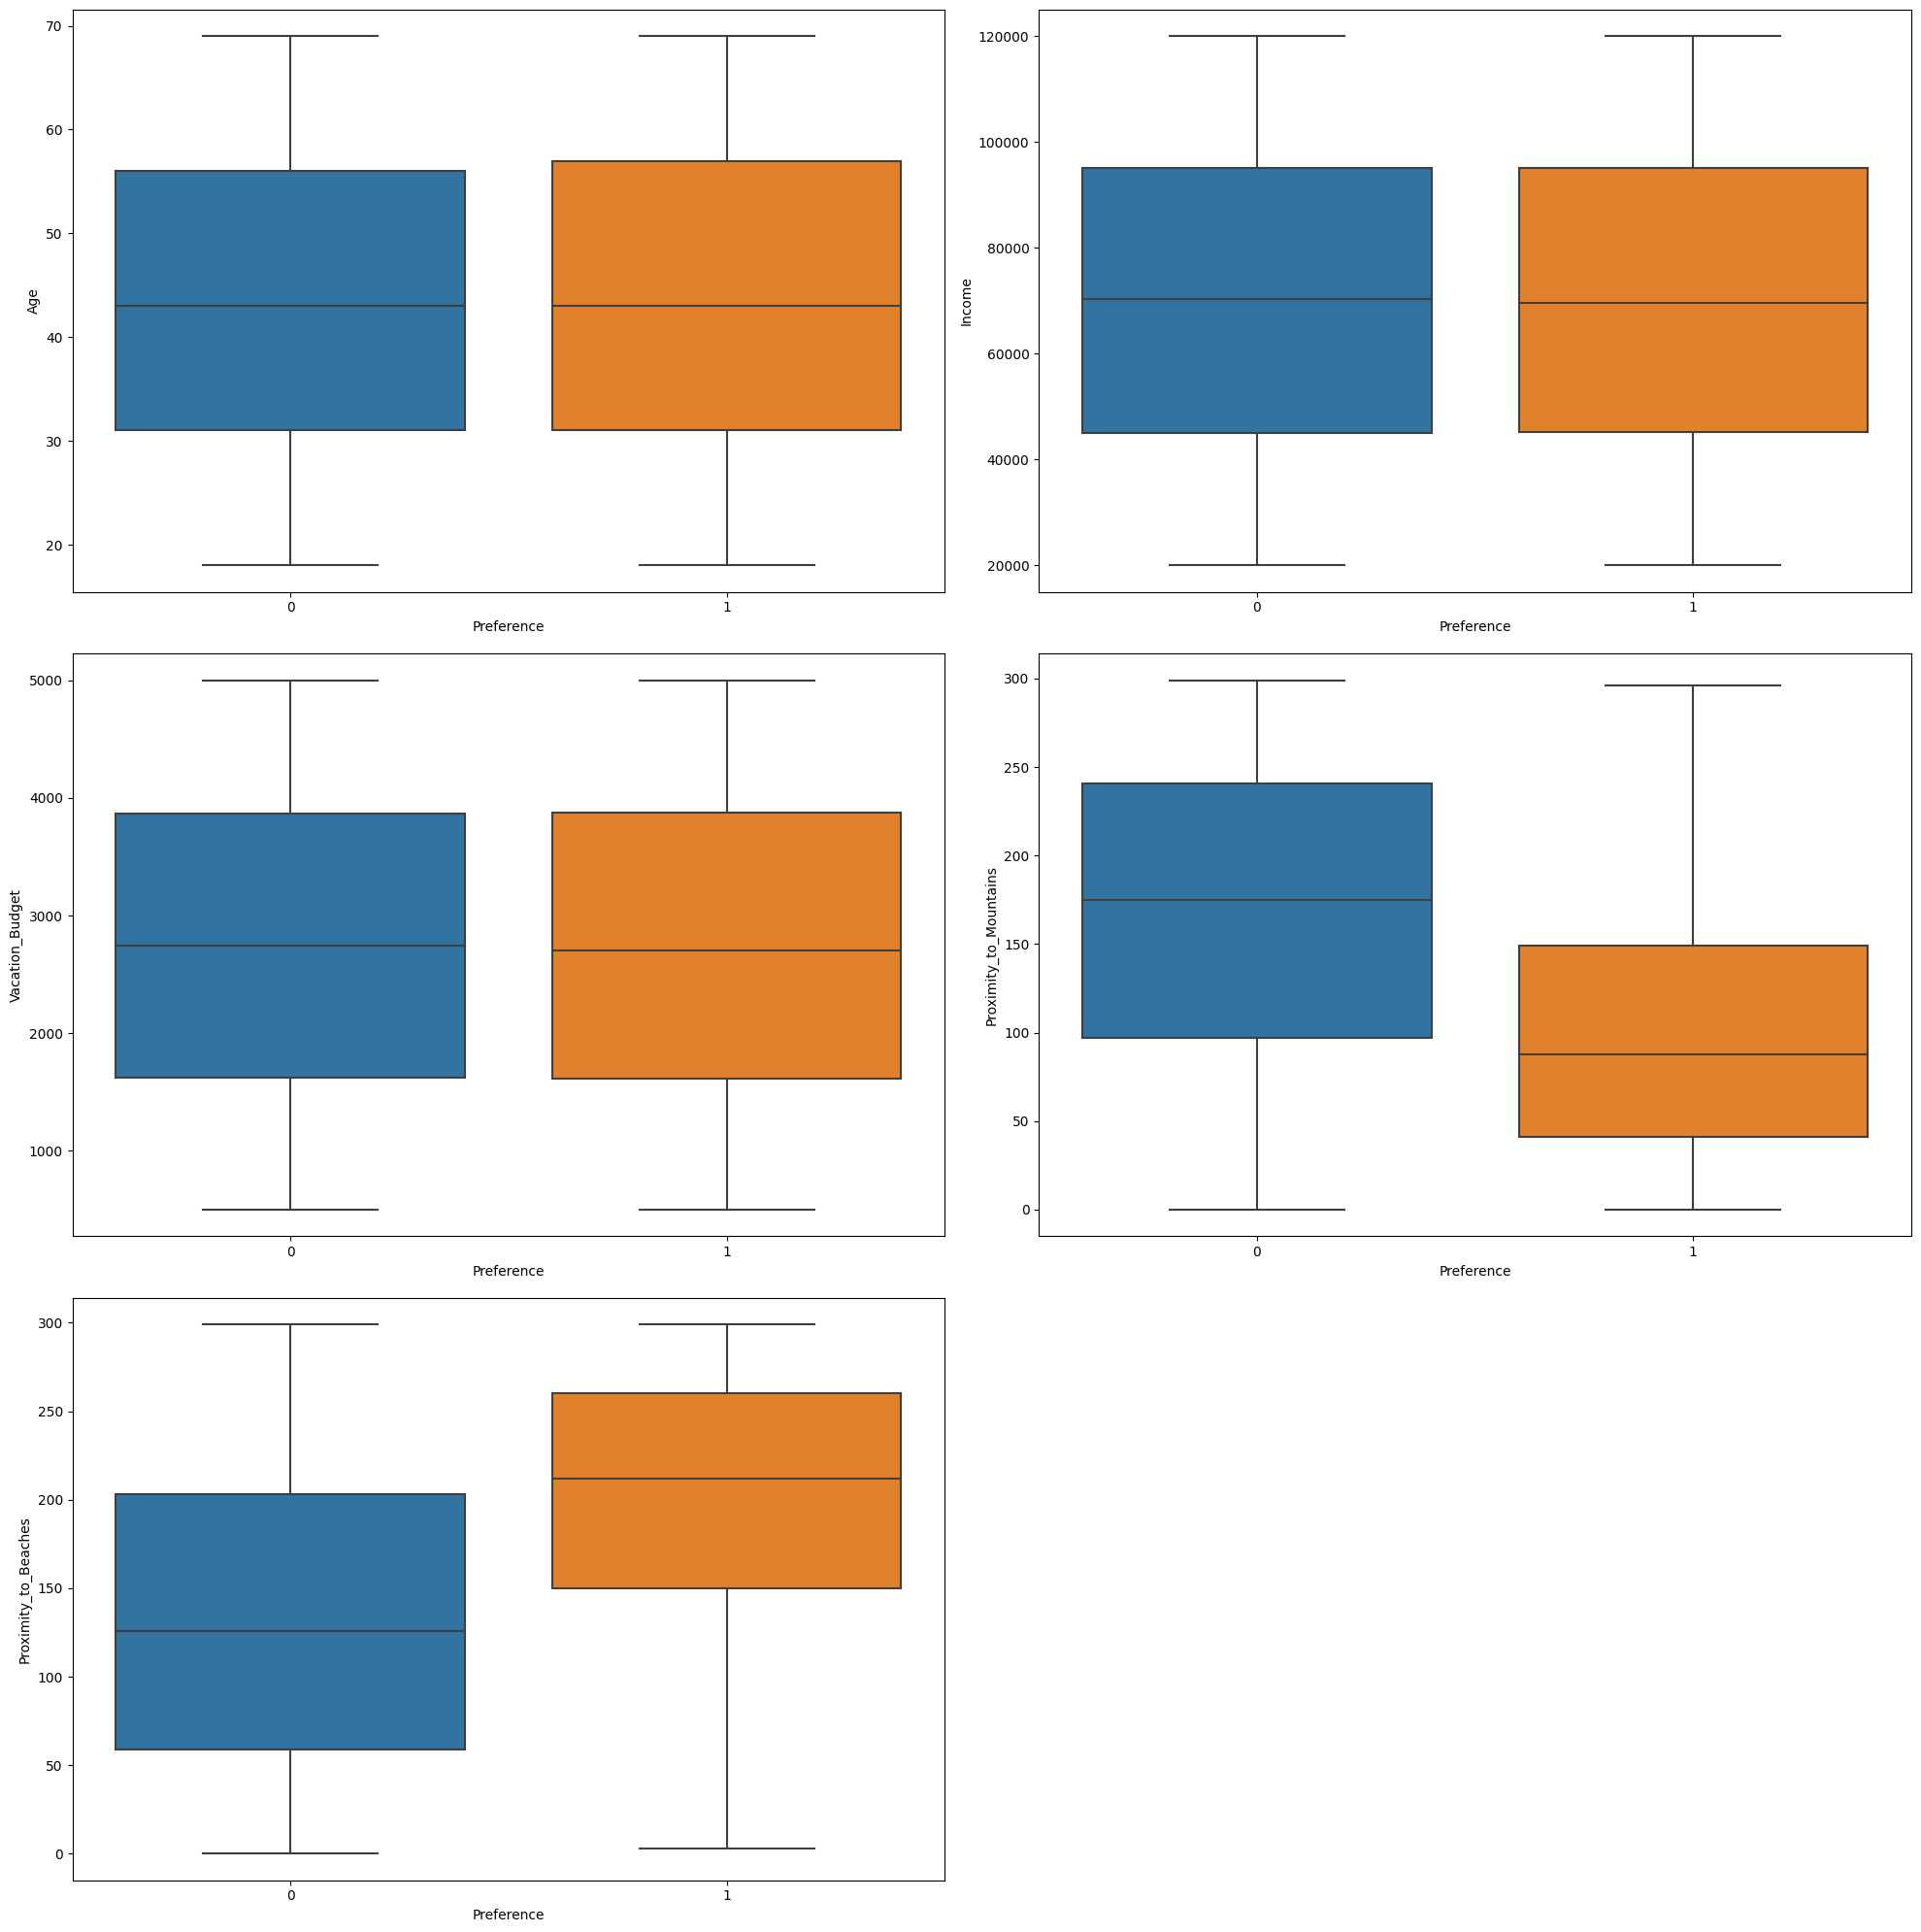

In [9]:
# Now let us visualize how our continuous features affect our target variable
# For that let us utilize boxplot

cols=['Age','Income','Vacation_Budget',
       'Proximity_to_Mountains', 'Proximity_to_Beaches']

fig, ax = plt.subplots(3, 2, figsize=(20, 20))
ax = ax.flatten()
i = 0

for col in cols:
    sns.boxplot(data=df, x='Preference', y=col, ax=ax[i])
    i += 1
plt.tight_layout()
ax[5].axis('off')
plt.show()

**Age vs. Preference:**


* Median age is similar for both preference groups.
* Both groups have a wide interquartile range (IQR), indicating diverse age distribution.
* There are no apparent outliers, suggesting consistent data across ages.


**Income vs. Preference:**

* Median income is comparable for both groups.
* Income distributions appear slightly skewed, with a larger IQR, reflecting variability in earnings.
* Both groups have similar ranges for income, indicating no significant income-based preference distinction.


**Vacation Budget vs. Preference:**

* Median vacation budget for group 1 appears slightly lower than group 0.
* Group 1 has a narrower IQR, suggesting less variation in vacation budgets.
* Group 0 exhibits more diversity in vacation budgets with a larger IQR.


**Proximity to Mountains vs. Preference:**

* Median proximity to mountains is slightly lower for group 1, suggesting this factor may influence preferences.
* IQR for both groups is wide, indicating diverse proximity ranges.
* Both groups exhibit similar range extremes, but group 1 shows a slightly tighter central distribution.

**Proximity to Beaches vs. Preference:**


* Preference 1 has a narrower IQR (Interquartile Range), suggesting that most individuals with this preference are consistently closer to beaches.
* Preference 0 shows a wider spread, indicating that proximity to beaches is more varied for this group.
* Both preferences share a similar range (0–300), but their distributions differ, with Preference 1 being more centered on higher values.


**General Findings:**


* No Strong Differentiators: The variables don't indicate stark contrasts between the two preference groups, but subtle differences in vacation budget and proximity to mountains could reflect slight preferences.
* Broad Distributions: Variables like income and age display wide variability, indicating a diverse dataset.
* Potential Influencers: Proximity to mountains, Proximity to Beaches and vacation budget might play a minor role in distinguishing preferences.


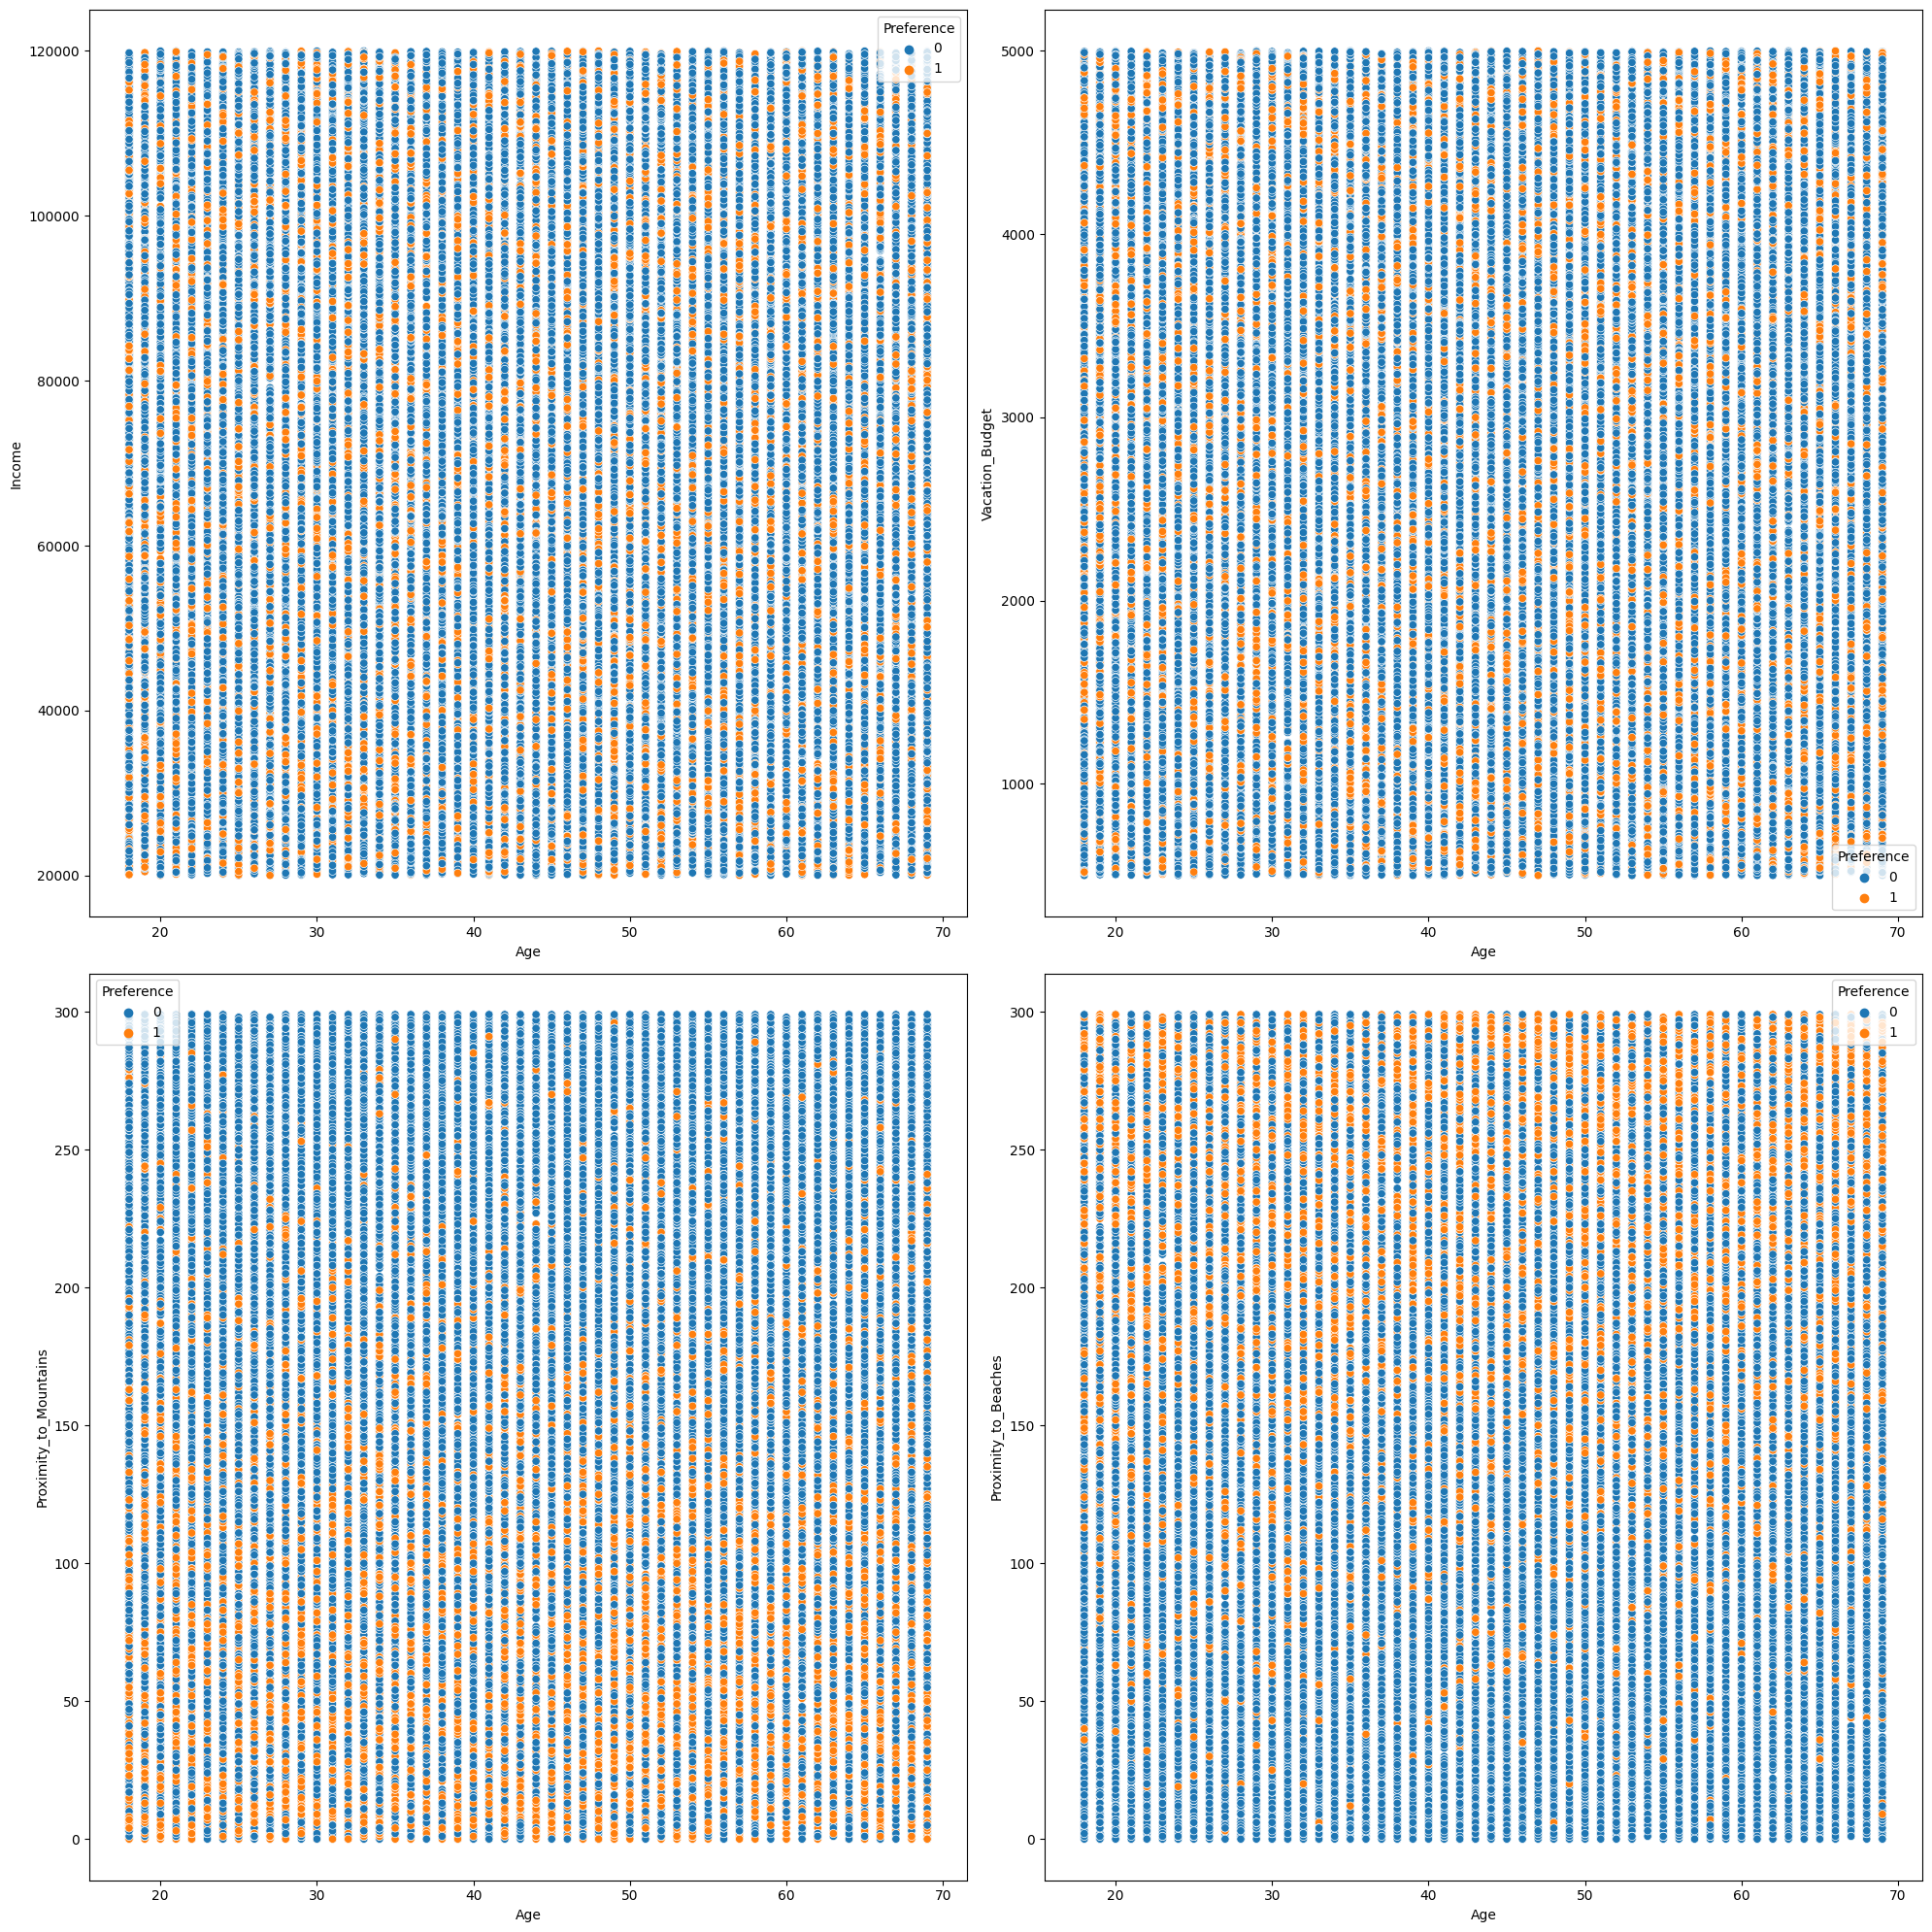

In [10]:
# let us see some relations between our features

cols=['Income','Vacation_Budget',
       'Proximity_to_Mountains', 'Proximity_to_Beaches']

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
ax = ax.flatten()
i = 0

for col in cols:
    sns.scatterplot(data=df, x='Age', y=col, ax=ax[i],hue='Preference')
    i += 1
plt.tight_layout()
plt.show()

**Insights:**


* The first two plots at the top does not really provide us with anything.
* When we observe the bottom two carefully we understand that if an individual lives closer to the mountains he preferes it more than the beaches and further you go away from the mountains the individuals start to prefer Beaches and the next plot is the opposite of this.


**We dont really find anything much by the above visualizations other than proximity_to_Mountains, Proximity_to_Oceans and Preferred Activities features affect our target variable a lot**

****
# Data Cleaning #
****

In [11]:
# importing 

from sklearn.preprocessing import LabelEncoder

In [12]:
# Let us look at out data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [13]:
# Let us see if we have any null values
df.isnull().any()

Age                       False
Gender                    False
Income                    False
Education_Level           False
Travel_Frequency          False
Preferred_Activities      False
Vacation_Budget           False
Location                  False
Proximity_to_Mountains    False
Proximity_to_Beaches      False
Favorite_Season           False
Pets                      False
Environmental_Concerns    False
Preference                False
dtype: bool

In [14]:
# no null values :)
# Let us delete duplicate records
df.drop_duplicates(keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [15]:
# no duplicates
# We can only pass features with numeric value into our algorithm therefore let us encode all the features with object datatype using label encoder
# We can also use get_dummies to encode them creating more columns, but as i will be using tree algos label encoder will do just fine

for col in df.columns[df.dtypes=='object']:
    print(df[col].value_counts(),'\n')

Gender
female        17638
male          17522
non-binary    17284
Name: count, dtype: int64 

Education_Level
doctorate      13293
bachelor       13127
high school    13072
master         12952
Name: count, dtype: int64 

Preferred_Activities
sunbathing    13221
skiing        13167
hiking        13102
swimming      12954
Name: count, dtype: int64 

Location
suburban    17503
urban       17476
rural       17465
Name: count, dtype: int64 

Favorite_Season
summer    13303
fall      13170
winter    13019
spring    12952
Name: count, dtype: int64 



In [16]:
# Encoding the above features with label encoder

le=LabelEncoder()

for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     52444 non-null  int64
 1   Gender                  52444 non-null  int64
 2   Income                  52444 non-null  int64
 3   Education_Level         52444 non-null  int64
 4   Travel_Frequency        52444 non-null  int64
 5   Preferred_Activities    52444 non-null  int64
 6   Vacation_Budget         52444 non-null  int64
 7   Location                52444 non-null  int64
 8   Proximity_to_Mountains  52444 non-null  int64
 9   Proximity_to_Beaches    52444 non-null  int64
 10  Favorite_Season         52444 non-null  int64
 11  Pets                    52444 non-null  int64
 12  Environmental_Concerns  52444 non-null  int64
 13  Preference              52444 non-null  int64
dtypes: int64(14)
memory usage: 5.6 MB
None


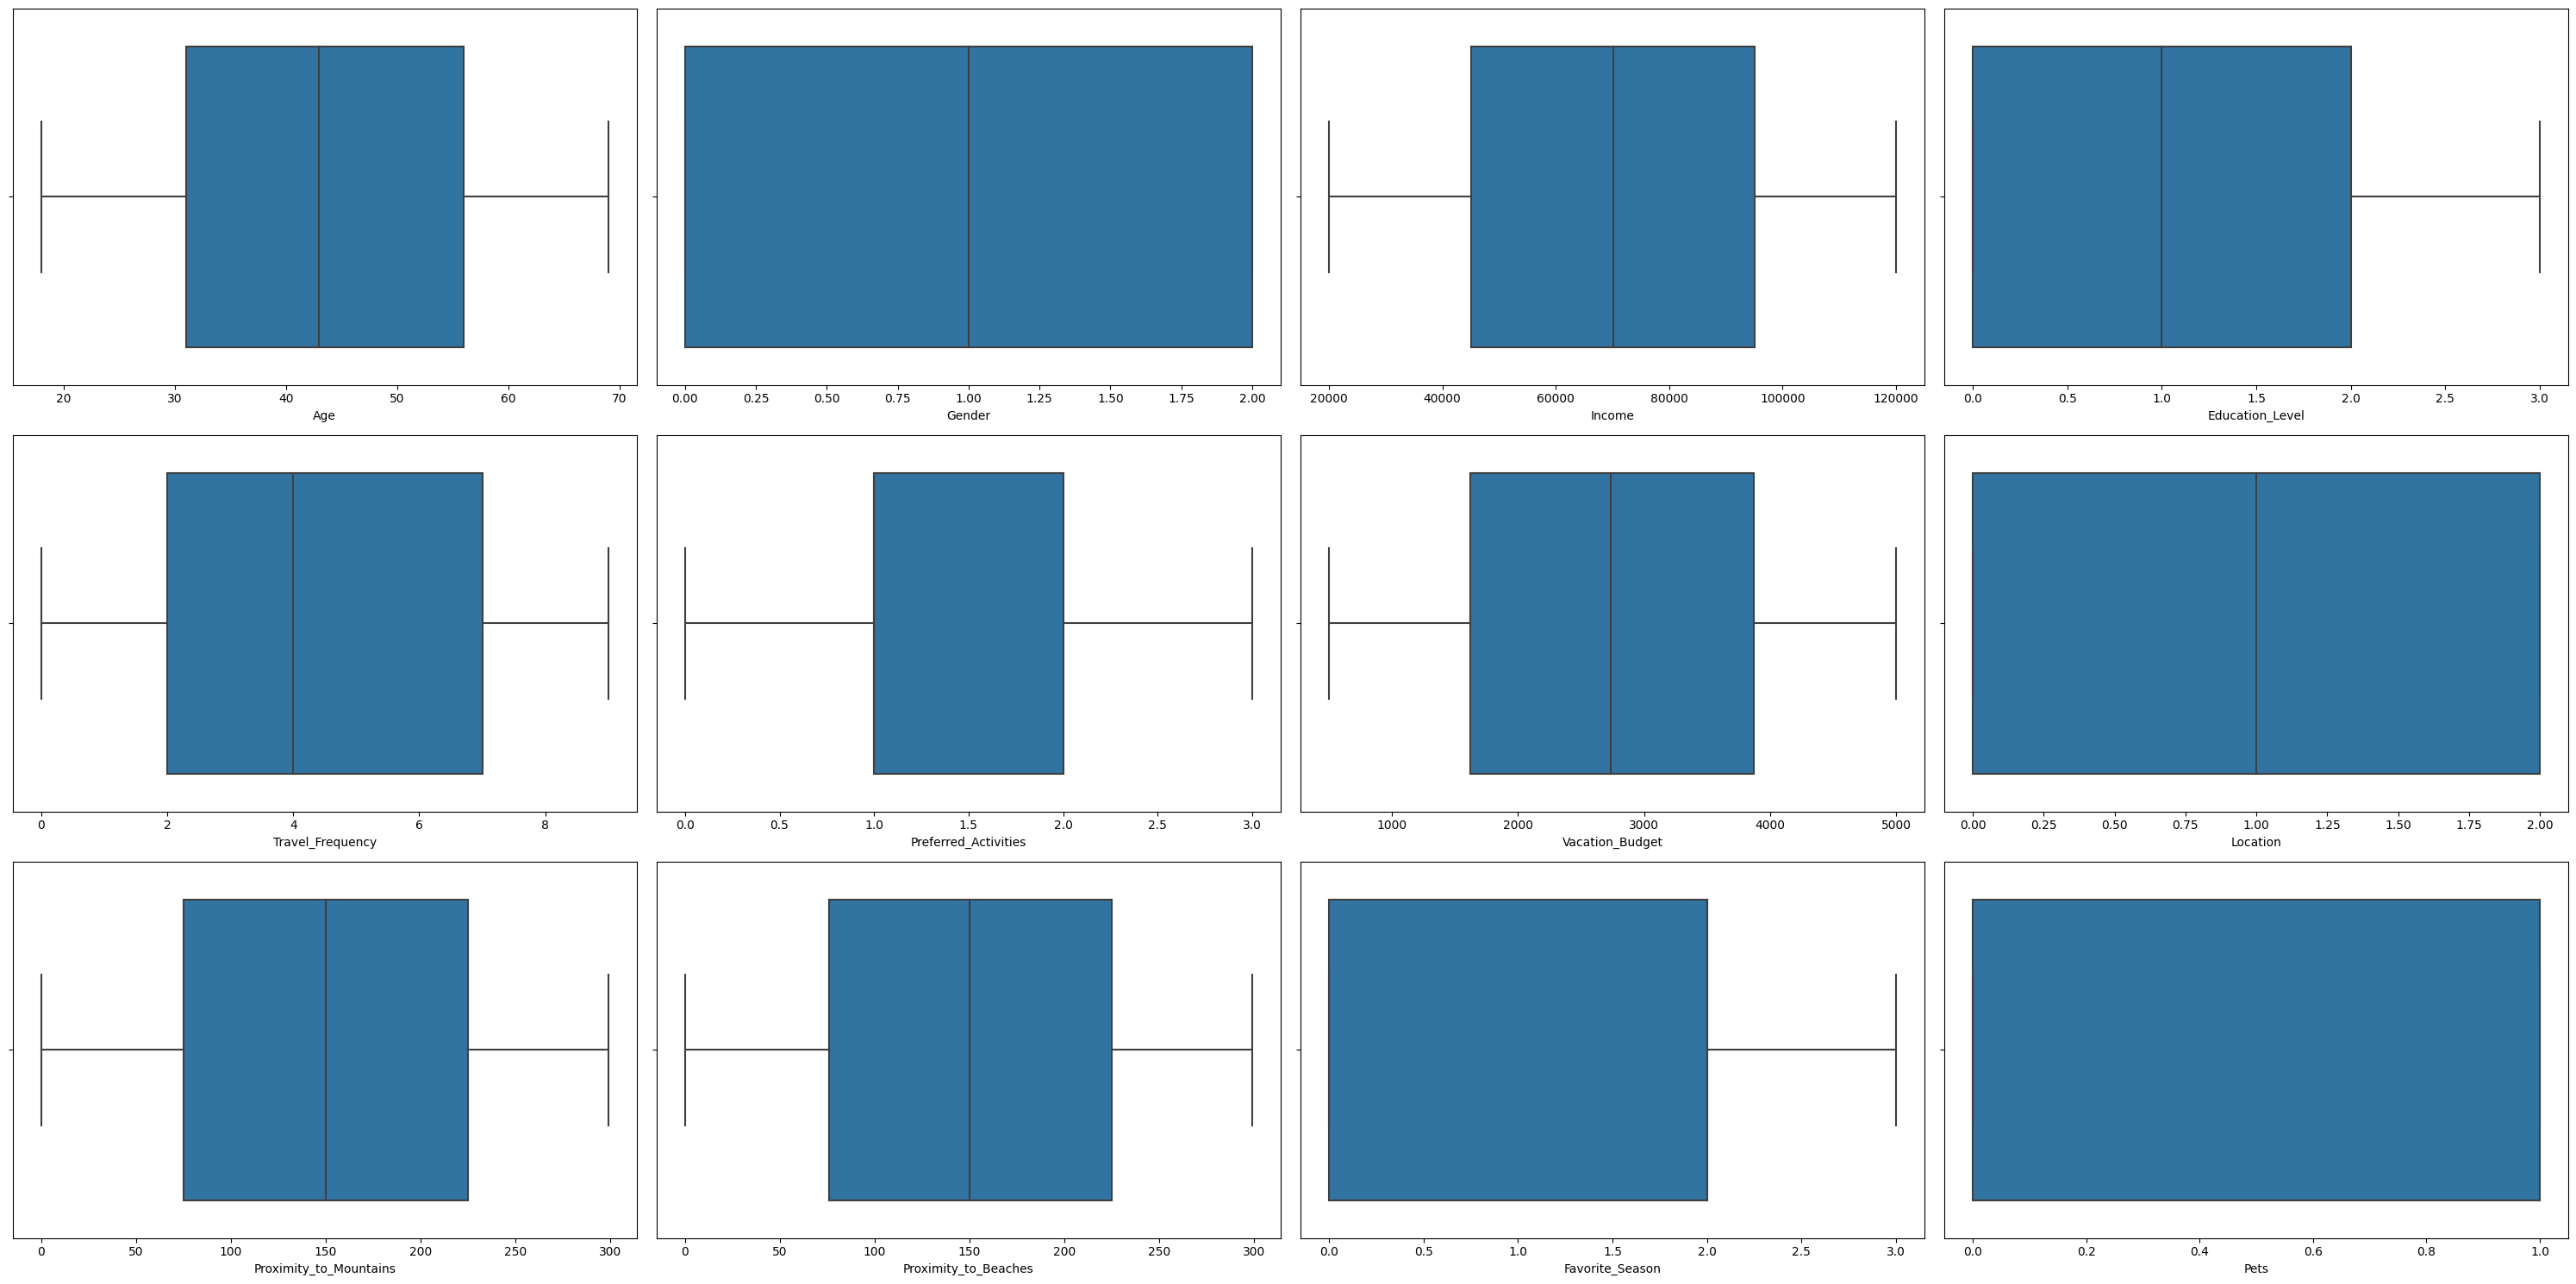

In [18]:
# Our data can be passed through a model now
# Let us find outliers and remove them
# Best way to find outliers for me is to use box plot

fig,ax=plt.subplots(3,4,figsize=(30,15))
ax=ax.flatten()
i=0

for col in df.columns:
    if col!='Preference' and i<12:
        sns.boxplot(data=df,x=col,ax=ax[i])
        i+=1

plt.tight_layout()
plt.show()

In [19]:
# No outliers YAAAAAY!!!
# Our data is clean

****
# Feature Engineering #
****

In [20]:
# importing 

from sklearn.feature_selection import mutual_info_classif

**In this Notebook I will not be creating any new features, but if you want to create new features, below are some of the examples**


* Total Travel Expenditure: Calculated as Travel Frequency×Vacation
* BudgetMountain Preference Index: Inverse of proximity to mountains (e.g., 1/Proximity to Mountains)
* Beach Preference Index: Inverse of proximity to beaches (e.g., 1/Proximity to Beaches) as a measure of preference for beach-related vacations.
* Income Bracket: Income categorized into ranges (e.g., low, medium, high).
* Travel Frequency Category: Categorized as low, medium, or high based on the number of vacations per year.


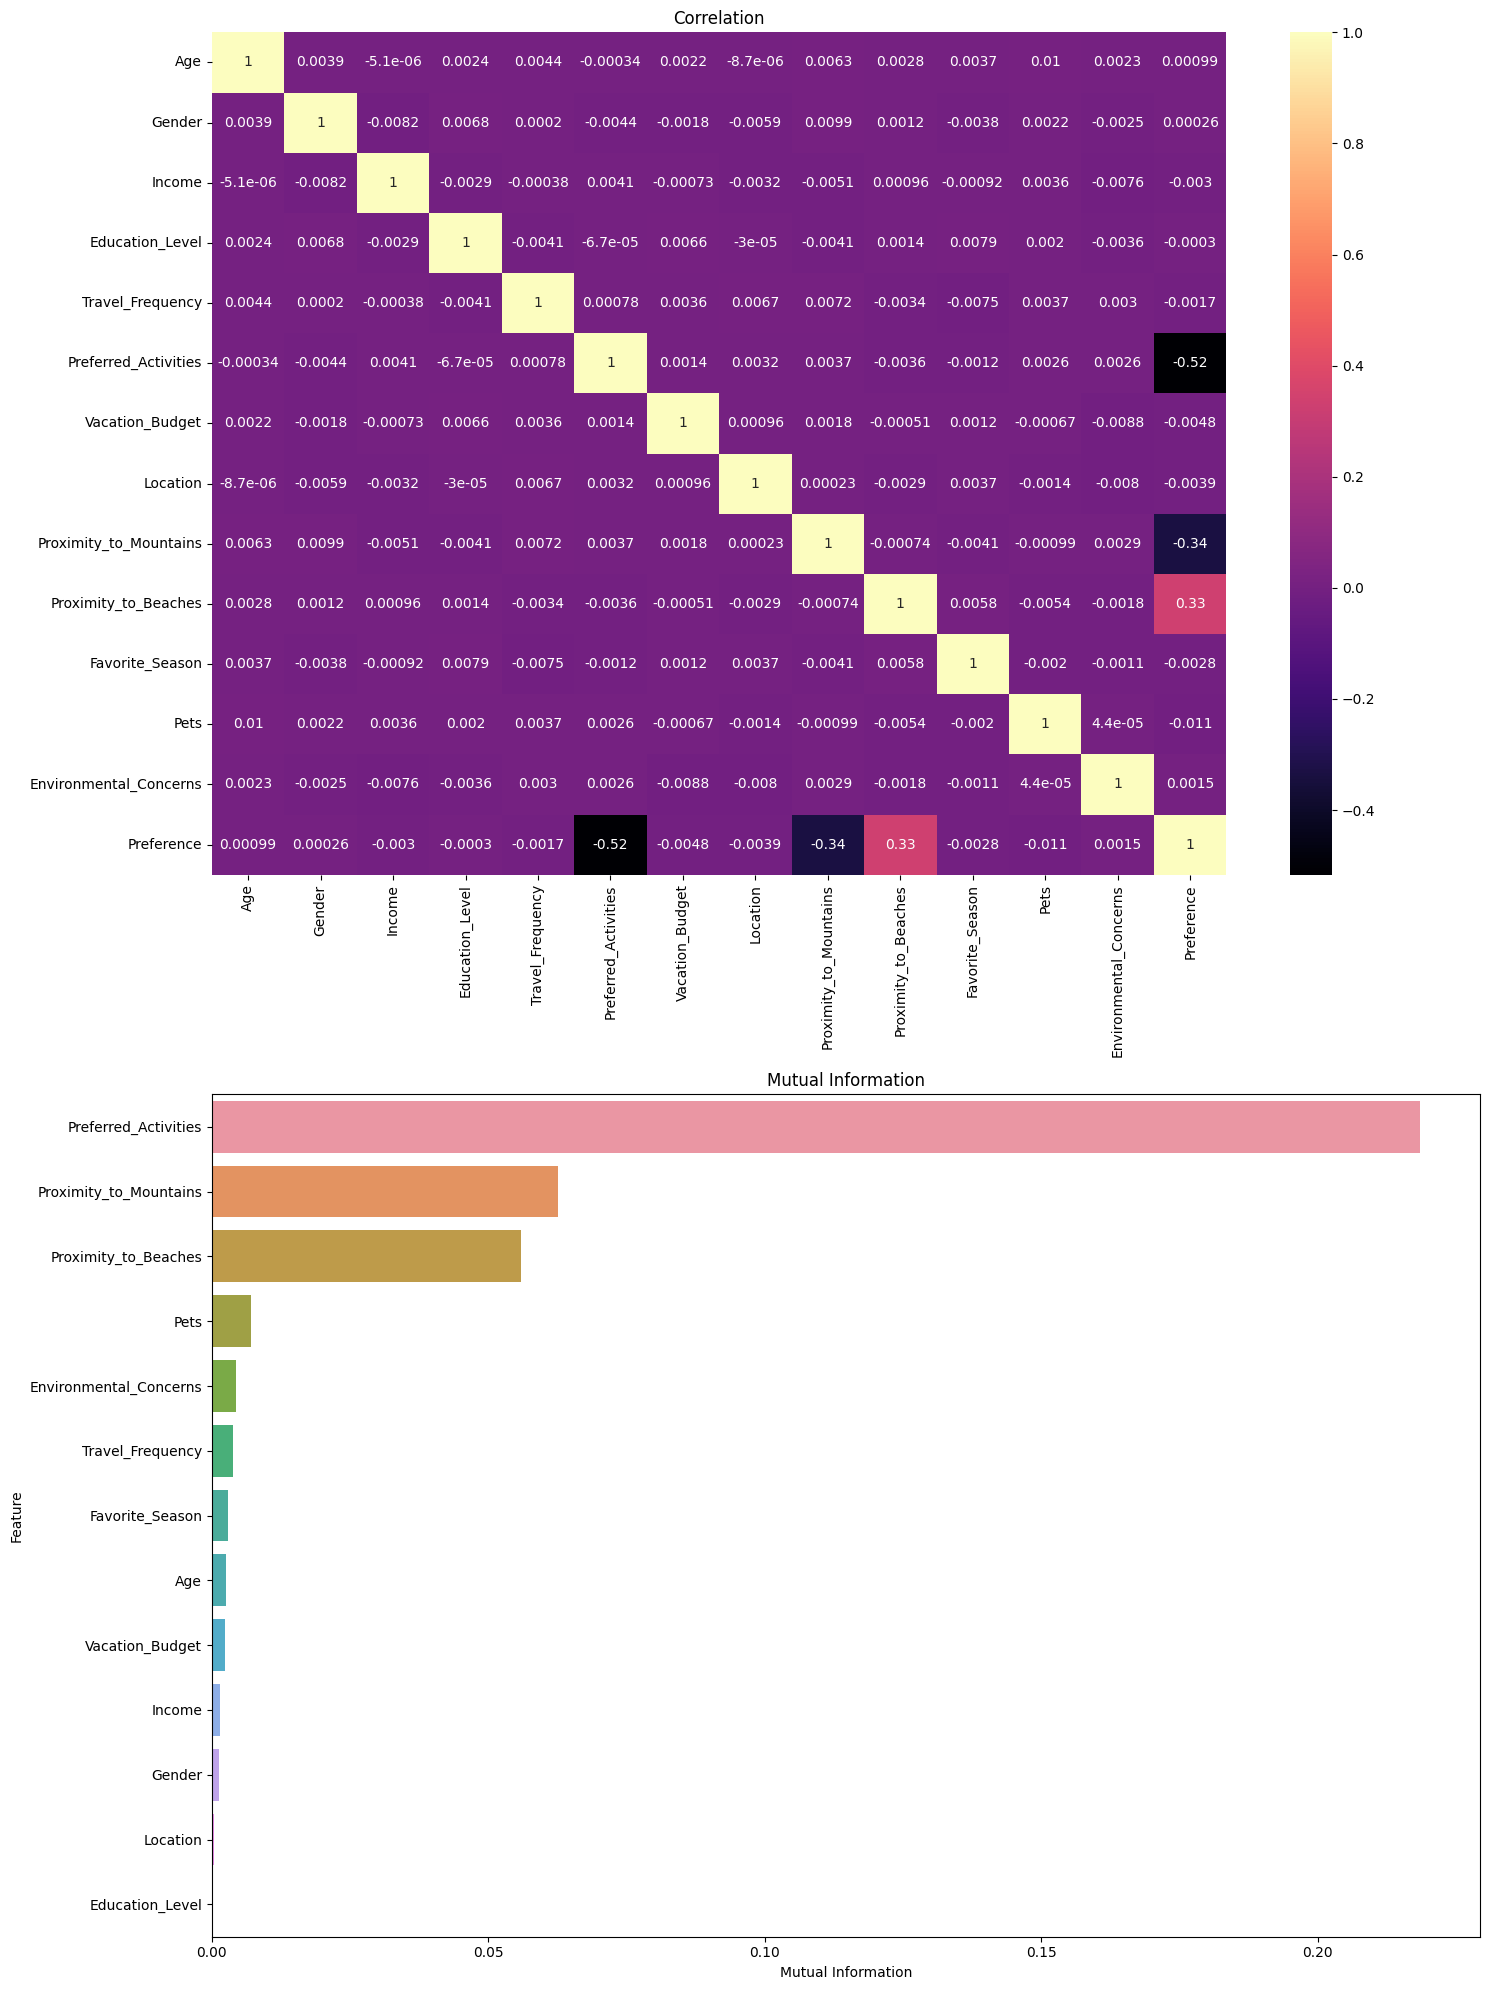

In [21]:
# Let us calculate Mutual information and then proceed to visualize correlation along with mutual information

# Calculating Mutual Information
tdf=df.copy()  
x=tdf.drop(columns='Preference')
y=tdf['Preference']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

# Visualizing Mutual Information and correlation 
fig,ax=plt.subplots(2,1,figsize=(15,20))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.tight_layout()
plt.show()

****
# Data Preparation #
****

In [22]:
# importing

from sklearn.model_selection import train_test_split

In [23]:
x=df.drop(columns='Preference')
y=df['Preference']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

****
# Models #
****

In [24]:
# importing

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,classification_report

In [25]:
acc_t=[]  #Stores training accuracy
acc=[] #Stores Testing accuracy
p_t=[] #Stores training Precision
p=[] #Stores testing Precision
r_t=[] #Stores training recall
r=[] #Stores Testing recall
f1_t=[] #Stores training  F1 Score
f1=[] #Stores testing  F1 Score
cr_t=[] #Stores training Classification report
cr=[] #Stores testing Classification report
cm=[] #Stores testing confusion matrices
cm_t=[] #Stores training confusion matrices

## Random Forest Classifier ##

In [26]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),
        'min_samples_leaf':list(np.arange(2,41)),'max_features':['sqrt','log2',None],'n_estimators':[150]}

nrf=RandomizedSearchCV(rf,param_distributions=params,random_state=20,cv=10,scoring='accuracy',n_jobs=-1)
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)

nrf=nrf.best_estimator_

{'n_estimators': 150, 'min_samples_split': 38, 'min_samples_leaf': 6, 'max_features': None, 'criterion': 'gini'}
0.9963134730942578


In [27]:
predt=nrf.predict(x_t)
pred=nrf.predict(x_te)

In [28]:
cr.append(classification_report(y_te,pred))
cr_t.append(classification_report(y_t,predt))
cm_t.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))
acc_t.append(accuracy_score(y_t,predt))
acc.append(accuracy_score(y_te,pred))
p_t.append(precision_score(y_t,predt))
p.append(precision_score(y_te,pred))
r_t.append(recall_score(y_t,predt))
r.append(recall_score(y_te,pred))
f1_t.append(f1_score(y_t,predt))
f1.append(f1_score(y_te,pred))

## Gradient Boosting Classifier ##

In [29]:
gb=GradientBoostingClassifier()
params={'n_estimators': [150], 'learning_rate': np.arange(0.01, 2.01, 0.01),'min_samples_split':list(np.arange(2,51)),
        'min_samples_leaf':list(np.arange(2,51)),'subsample': [0.5, 0.8, 1.0],'max_features':['sqrt','log2',None]}
ngb=RandomizedSearchCV(gb,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ngb.fit(x_t ,y_t)
print(ngb.best_params_)
print(ngb.best_score_)

{'subsample': 0.8, 'n_estimators': 150, 'min_samples_split': 23, 'min_samples_leaf': 14, 'max_features': None, 'learning_rate': 0.59}
0.9955507935344577


In [30]:
ngb=ngb.best_estimator_
predt1=ngb.predict(x_t)
pred1=ngb.predict(x_te)

In [31]:
cr.append(classification_report(y_te,pred1))
cr_t.append(classification_report(y_t,predt1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

****
# Evaluation Metrics #
****

In [32]:
Models=['Random Forest Classifier','Graident Boosting Classifier']

In [33]:
for model, report in zip(Models, cr_t):
    print(f"Training Classification Report for {model}:\n{report}\n")

Training Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29531
           1       1.00      1.00      1.00      9802

    accuracy                           1.00     39333
   macro avg       1.00      1.00      1.00     39333
weighted avg       1.00      1.00      1.00     39333


Training Classification Report for Graident Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29531
           1       1.00      1.00      1.00      9802

    accuracy                           1.00     39333
   macro avg       1.00      1.00      1.00     39333
weighted avg       1.00      1.00      1.00     39333




In [34]:
for model, report in zip(Models, cr_t):
    print(f"Testing Classification Report for {model}:\n{report}\n")

Testing Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29531
           1       1.00      1.00      1.00      9802

    accuracy                           1.00     39333
   macro avg       1.00      1.00      1.00     39333
weighted avg       1.00      1.00      1.00     39333


Testing Classification Report for Graident Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29531
           1       1.00      1.00      1.00      9802

    accuracy                           1.00     39333
   macro avg       1.00      1.00      1.00     39333
weighted avg       1.00      1.00      1.00     39333




In [35]:
m_t=pd.DataFrame({'Classification Algorithms':Models,'Training Accuracy':acc_t,'Training Precision':p_t,
                  'Training Recall':r_t,'Training F1 Score':f1_t})
m_t.sort_values(by=['Training Accuracy','Training Precision','Training Recall','Training F1 Score'],ascending=False).reset_index(drop=True)

Classification Algorithms  Training Accuracy  Training Precision  \
0  Graident Boosting Classifier           0.999924            0.999796   
1      Random Forest Classifier           0.998805            0.997958   

   Training Recall  Training F1 Score  
0         0.999898           0.999847  
1         0.997245           0.997602

In [36]:
m_te=pd.DataFrame({'Classification Algorithms':Models,'Testing Accuracy':acc,'Testing Precision':p,
                  'Testing Recall':r,'Testing F1 Score':f1})
m_te.sort_values(by=['Testing Accuracy','Testing Precision','Testing Recall','Testing F1 Score'],ascending=False).reset_index(drop=True)

Classification Algorithms  Testing Accuracy  Testing Precision  \
0      Random Forest Classifier          0.996797           0.994907   
1  Graident Boosting Classifier          0.994814           0.990132   

   Testing Recall  Testing F1 Score  
0        0.992528          0.993716  
1        0.989540          0.989836

<Axes: >

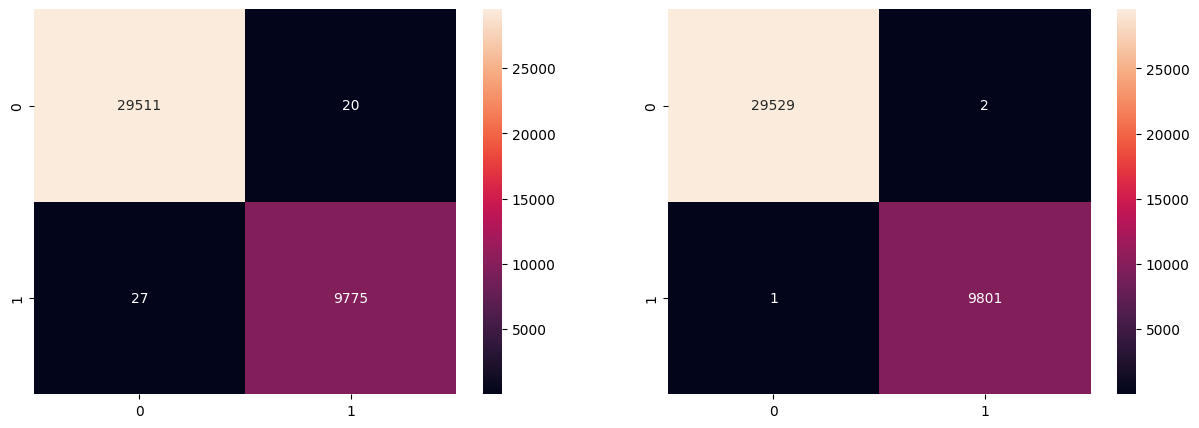

In [37]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.heatmap(cm_t[0],annot=True,fmt='d',ax=ax[0])
sns.heatmap(cm_t[1],annot=True,fmt='d',ax=ax[1])

<Axes: >

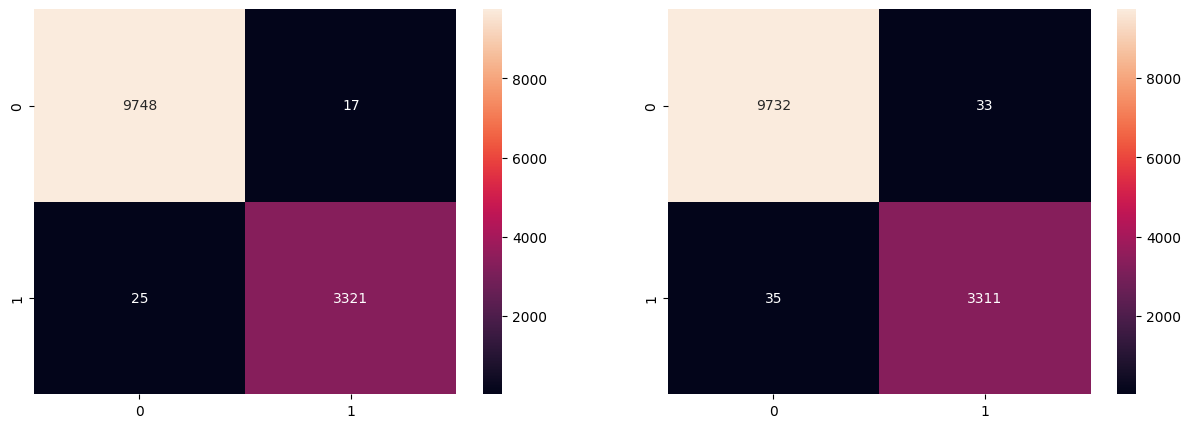

In [38]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.heatmap(cm[0],annot=True,fmt='d',ax=ax[0])
sns.heatmap(cm[1],annot=True,fmt='d',ax=ax[1])

****
# Conclusion #
****

The Random Forest Classifier slightly outperforms the Gradient Boosting Classifier across all metrics, with higher accuracy, precision, recall, and F1 score. However, the difference between the two models is very small (less than 0.1% in all metrics).

Both classifiers show excellent performance with very high scores in accuracy, precision, recall, and F1 score. The choice between them would likely depend on other factors such as model complexity, interpretability, or training time rather than performance, as both models are highly effective.

****
# Feedback and Suggestions #
****

**Kindly provide feedback and suggestions to improve this notebook**

**If you liked this Notebook or you found this helpful kindly Upvote :)**